In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('/content/bank-additional.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Let's look at the dataset size, feature names and their types


In [31]:
df.shape

(4119, 21)

In [32]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


The dataset contains 41188 objects (rows), for each of which 21 features are set (columns), including 1 target feature (`y`).


### Attributing information


In [33]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [35]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [36]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [37]:
df["y"].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [38]:
df["marital"].value_counts(normalize = True)

marital
married     0.609128
single      0.279922
divorced    0.108279
unknown     0.002671
Name: proportion, dtype: float64

In [39]:
df.apply(np.max)

age                      88
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               3643
campaign                 35
pdays                   999
previous                  6
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

In [40]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


### Indexing and extracting data


In [41]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 10.9%


In [42]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 20 sec


So, the average duration of a successful call is almost 553 seconds, that is, nearly 10 minutes.


**What is the average age of attracted (`y == 1`) and unmarried (`'marital' == 'single'`) clients?**


In [43]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 32 years


The average age of unmarried attracted clients is 31, which should be considered when working with such clients.


## Pivot tables


In [44]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,403,2257,998,10
1,43,252,155,1


In [45]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.109869,0.615322,0.272083,0.002726
1,0.095344,0.558758,0.343681,0.002217


In [46]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.240119,261.871542
blue-collar,39.265837,261.852941
entrepreneur,42.202703,249.202703
housemaid,45.672727,229.663636
management,42.429012,246.799383
retired,60.873494,311.789157
self-employed,40.679245,254.924528
services,38.513995,232.529262
student,26.695122,287.134146


In [47]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)


mean           count         
                           age  campaign   age campaign
education                                              
basic.4y             47.657343  2.421911   429      429
basic.6y             40.144737  2.649123   228      228
basic.9y             39.231707  2.348432   574      574
high.school          38.097720  2.630836   921      921
illiterate           42.000000  4.000000     1        1
professional.course  40.207477  2.512150   535      535
university.degree    39.017405  2.583070  1264     1264
unknown              42.826347  2.538922   167      167

## Visualization in Pandas


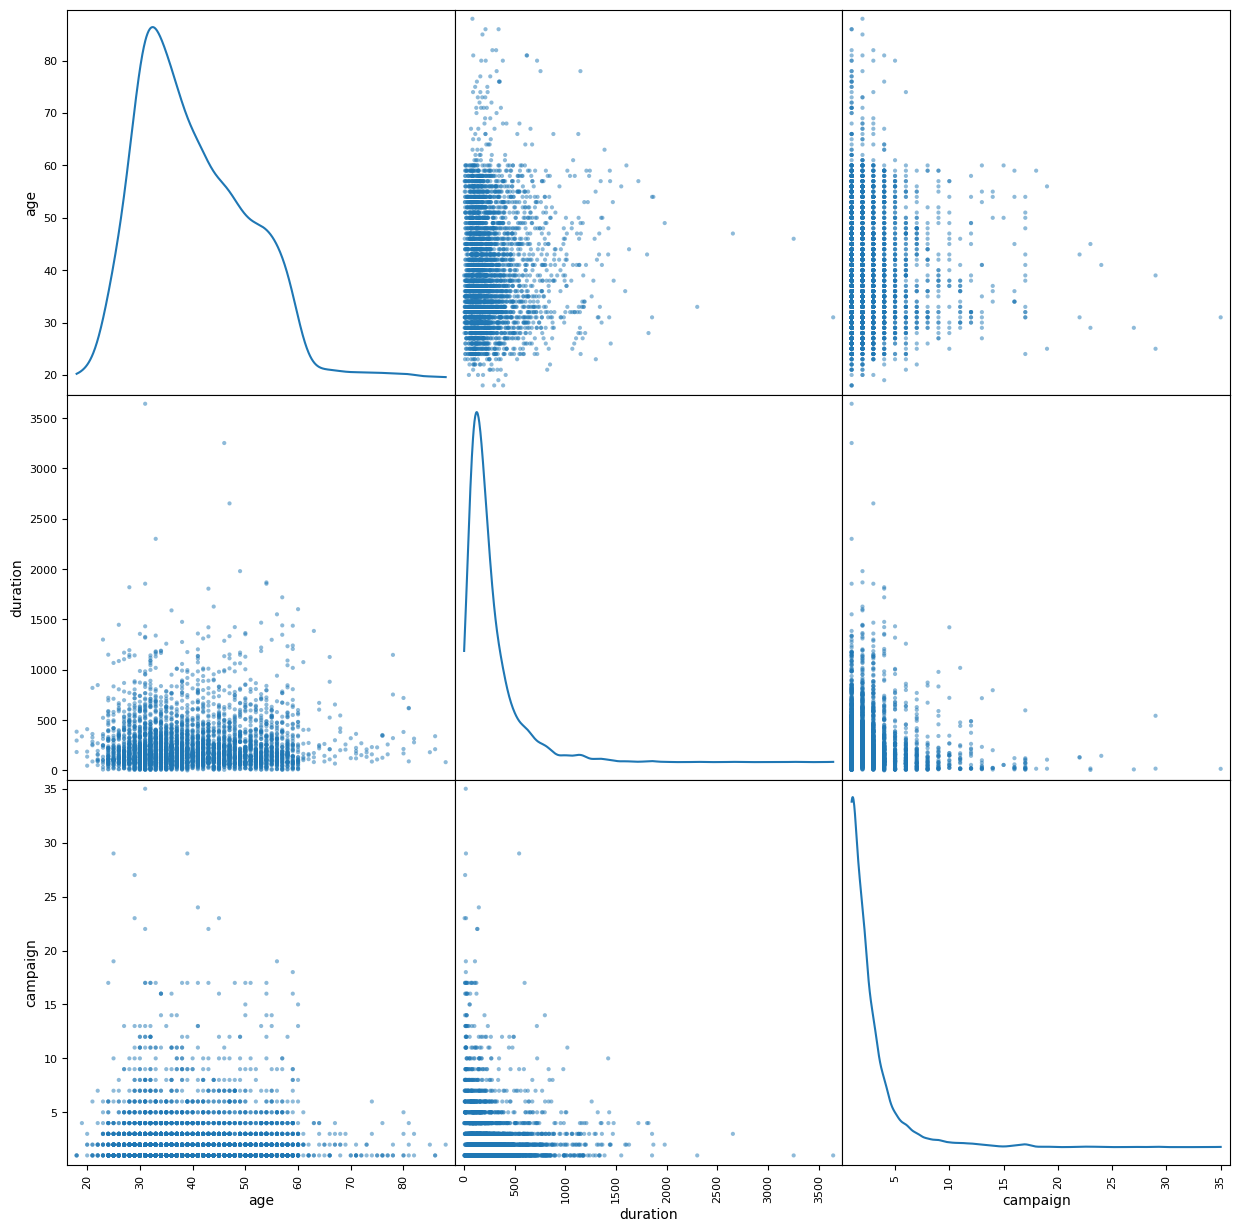

In [48]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

<Axes: >

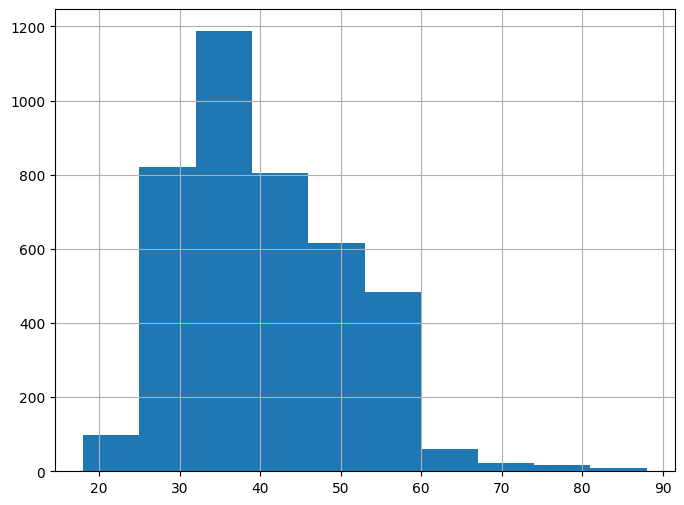

In [49]:
df["age"].hist()

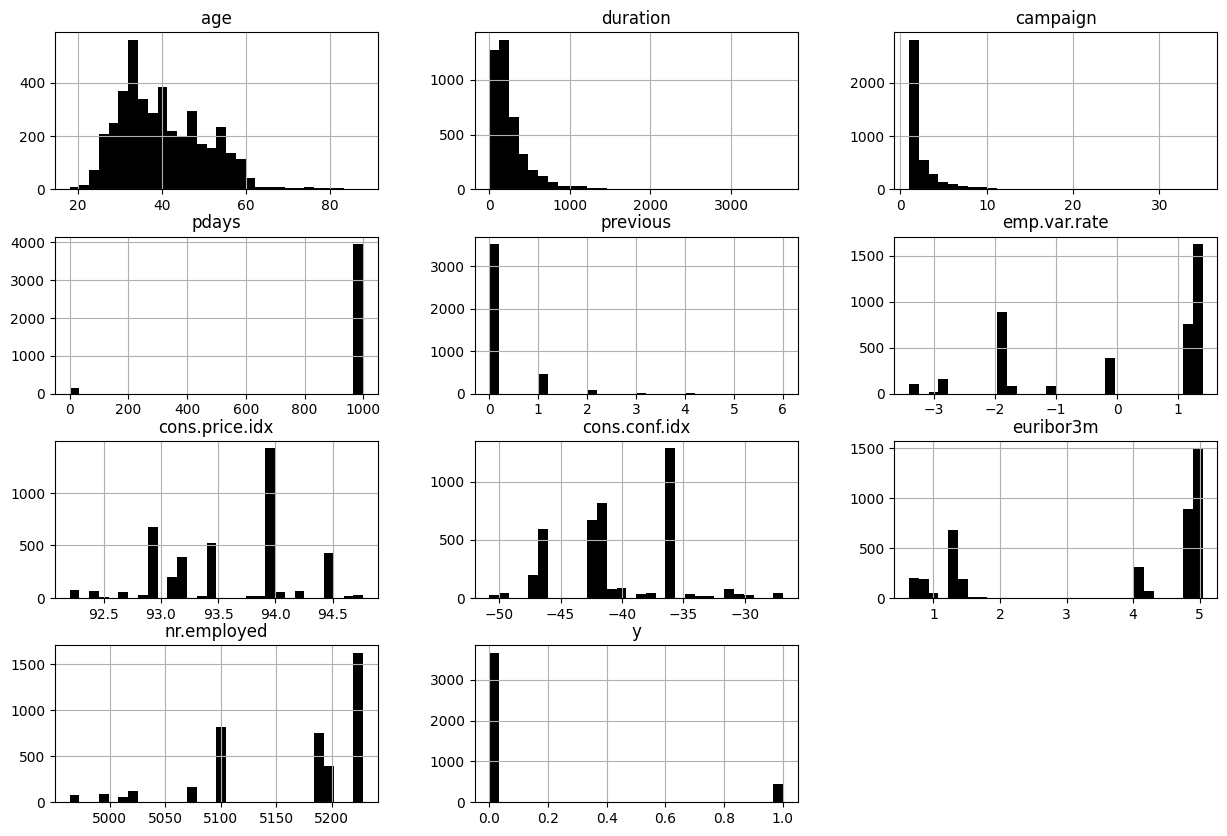

In [50]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

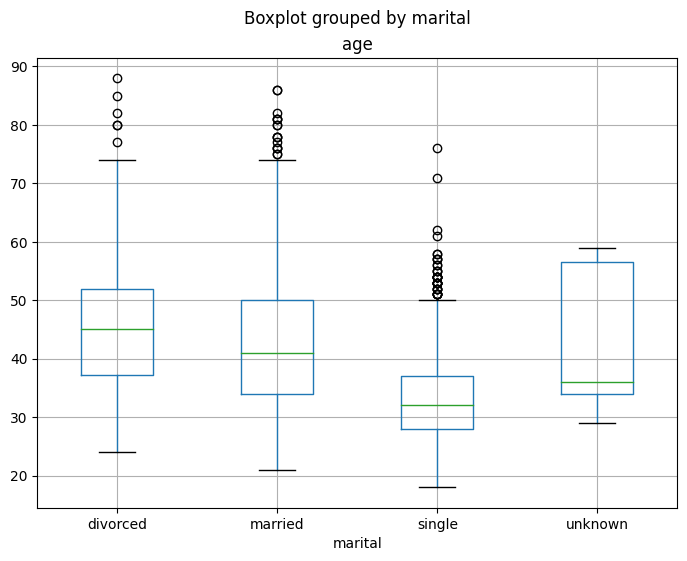

In [51]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

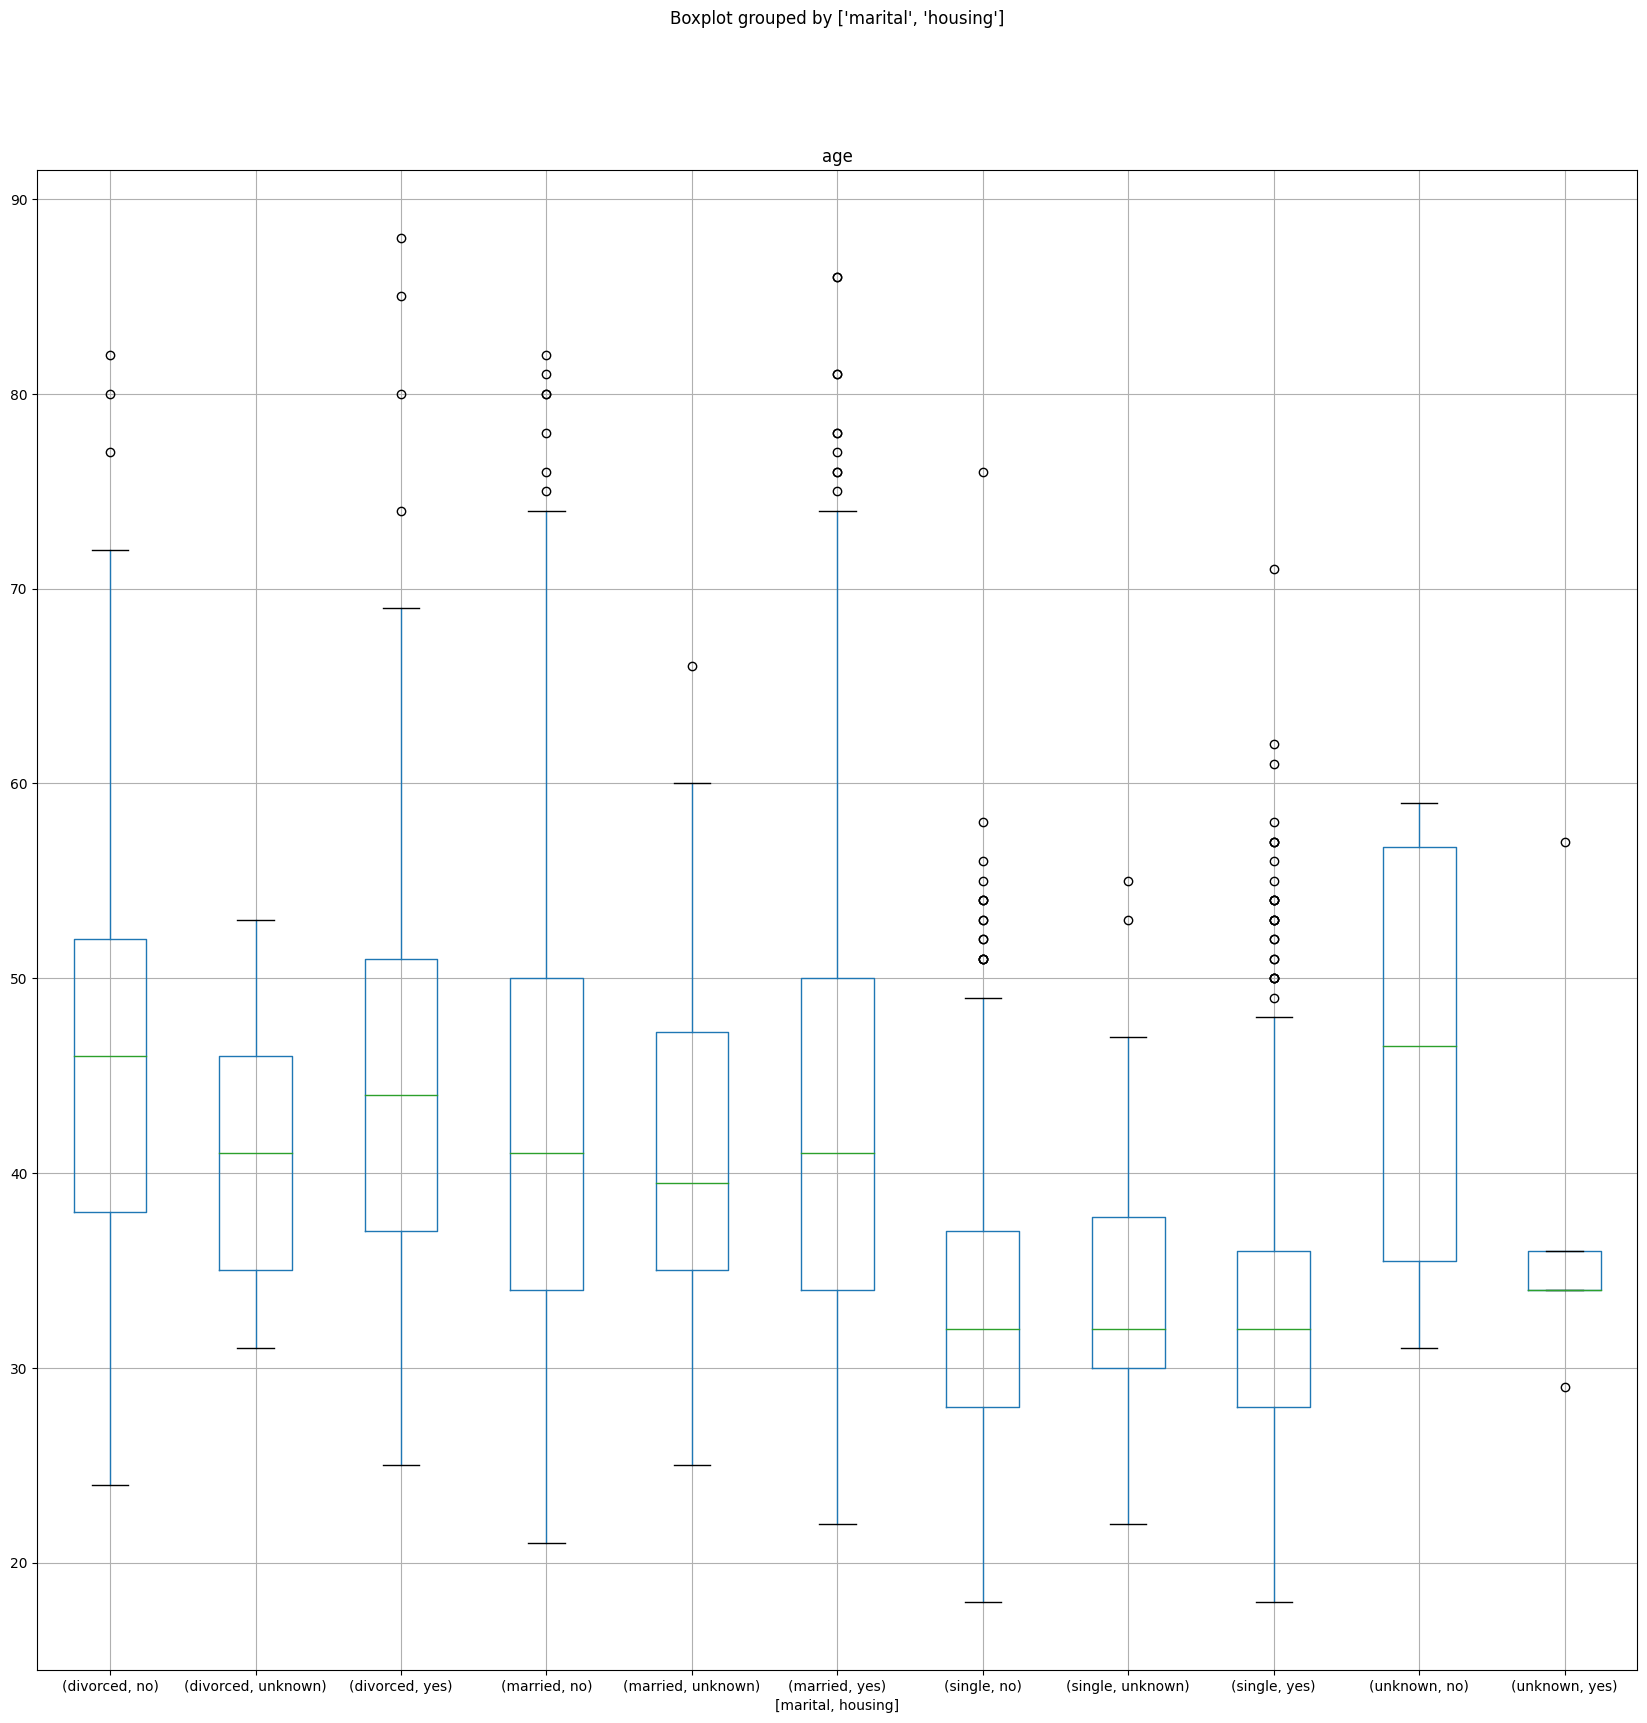

In [52]:

df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 20))
plt.show()

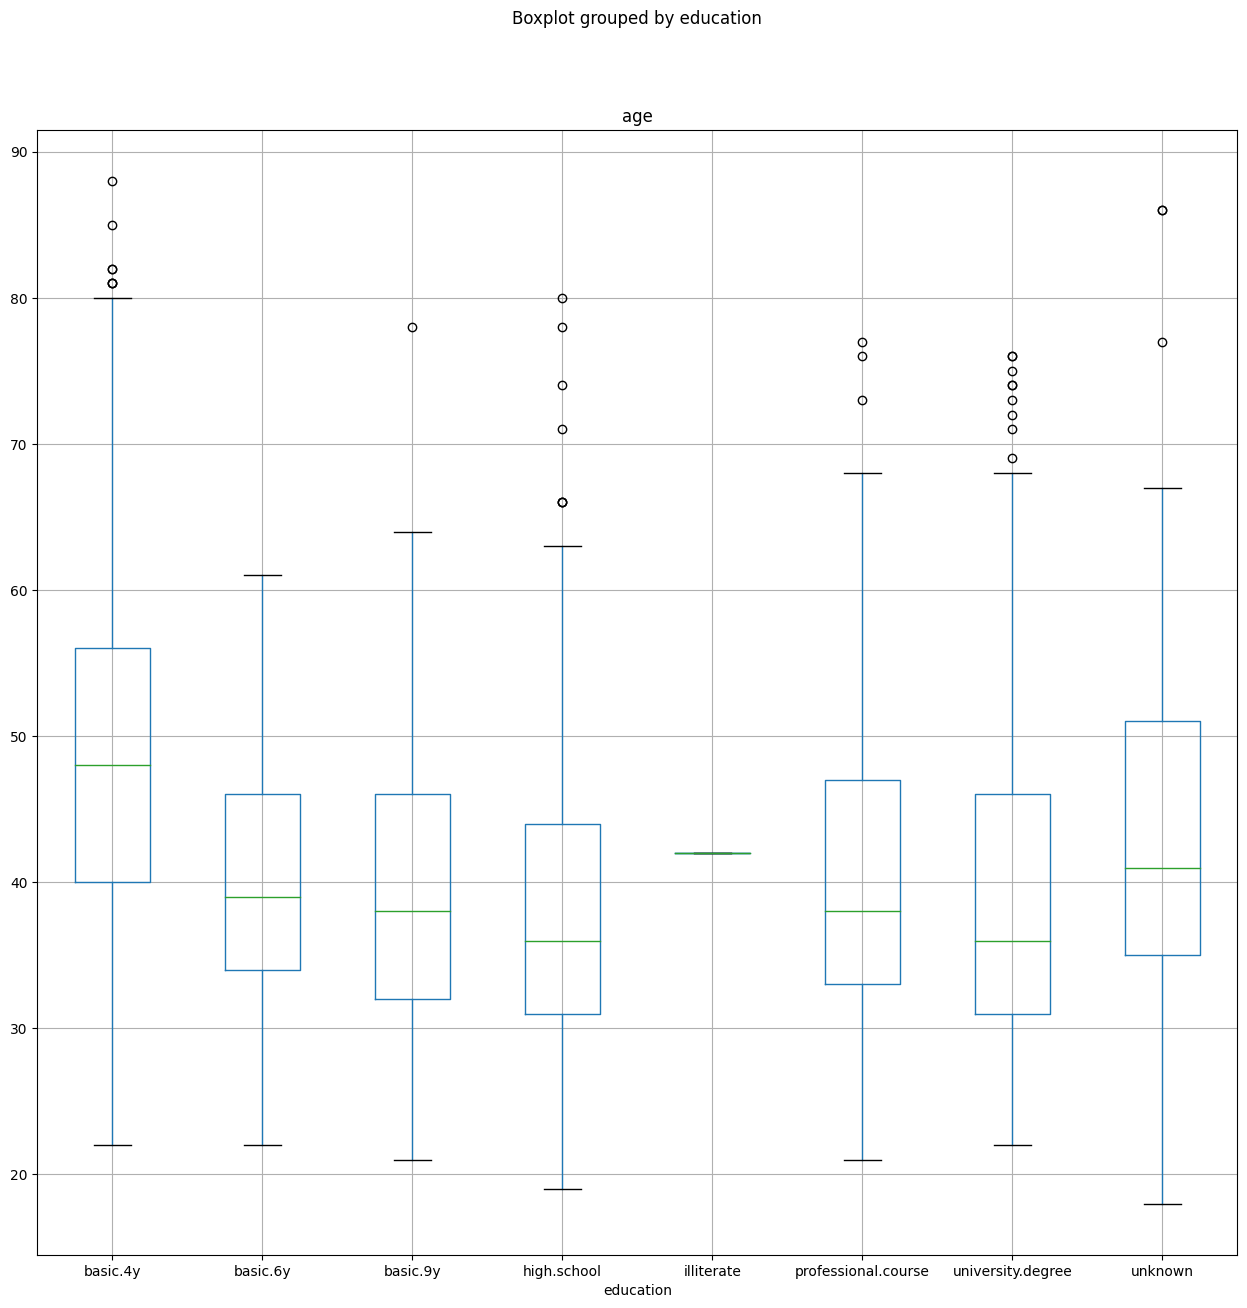

In [27]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()